In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Penguin Dataset Explanation

## Overview

The dataset used in this analysis is the "Penguins" dataset, which contains measurements for three different species of penguins: Adelie, Chinstrap, and Gentoo. The dataset includes the following columns:

- `culmen_length_mm`: Culmen length (mm)
- `culmen_depth_mm`: Culmen depth (mm)
- `flipper_length_mm`: Flipper length (mm)
- `body_mass_g`: Body mass (g)
- `sex`: Penguin sex

This is an unlabeled dataset, meaning it does not contain explicit labels for the species of penguins. Our goal is to use clustering techniques to group the penguins based on their physical characteristics.


## Data Visualization

To understand the distribution and identify any potential outliers in the dataset, we visualize the data using boxplots. Boxplots provide a graphical representation of the data distribution and highlight any outliers.

In [2]:
# Load dataset
df = pd.read_csv("dataset/penguins.csv")

# Visualize the data using a boxplot
# df.boxplot()
# plt.show()

# df.head()

## Data Cleaning

Before proceeding with clustering, it is essential to clean the dataset by handling missing values and removing outliers. We drop rows with missing values and remove outliers based on specific conditions for the `flipper_length_mm` feature.

In [3]:
# Drop rows with missing values
df = df.dropna()

# Remove outliers based on specific conditions
df = df[df["flipper_length_mm"] <= 4000]
df = df[df["flipper_length_mm"] >= 0]

## Random Sampling

To make the analysis more manageable, we randomly select 100 data points from the cleaned dataset.

In [4]:
# Randomly select 100 data points
df_sampled = df.sample(n=100, random_state=42)

## Feature Selection

For clustering, we could select from the following numerical features:

- `culmen_length_mm`
- `culmen_depth_mm`
- `flipper_length_mm`

These features are chosen because they provide significant information about the physical characteristics of the penguins, which can help in distinguishing between different species.

In [17]:
# Select relevant numerical features for clustering
features = ["culmen_length_mm", "culmen_depth_mm"]
X = df_sampled[features].values

X_full = df[features].values

## Data Standardization

To ensure that all features contribute equally to the clustering process, we standardize the features using StandardScaler. Standardization scales the features to have a mean of 0 and a standard deviation of 1.

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_full_scaled = scaler.fit_transform(X_full)

# K-Means Clustering Implementation

## Introduction

K-Means is a popular clustering algorithm used to partition a dataset into `k` clusters. The algorithm aims to minimize the within-cluster variance. The steps involved in the K-Means algorithm are:

1. **Initialize Centroids**: Randomly select `k` data points as initial centroids.
2. **Assign Clusters**: Assign each data point to the nearest centroid.
3. **Update Centroids**: Calculate the new centroids as the mean of the data points assigned to each cluster.
4. **Check Convergence**: Repeat steps 2 and 3 until the centroids do not change.

## Implementation

### Step 1: Initialize Centroids

We start by randomly selecting `k` data points from the dataset as the initial centroids.


In [7]:
def initialize_centroids(X, k):
    """Randomly initialize centroids."""
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

### Step 2: Assign Clusters

Next, we assign each data point to the nearest centroid. We calculate the Euclidean distance between each data point and the centroids and assign the data point to the centroid with the minimum distance.

In [8]:
def assign_clusters(X, centroids):
    """Assign clusters based on closest centroid."""
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

### Step 3: Update Centroids

After assigning the clusters, we update the centroids by calculating the mean of the data points assigned to each cluster.

In [9]:
def update_centroids(X, labels, k):
    """Update centroids as the mean of assigned points."""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

### Step 4: Check Convergence

We check if the centroids have converged by comparing the old and new centroids. If they are the same, the algorithm has converged.

In [10]:
def has_converged(centroids, new_centroids):
    """Check if centroids have converged."""
    return np.all(centroids == new_centroids)

### K-Means Algorithm

We combine the above steps to implement the K-Means algorithm. The algorithm iterates until the centroids converge or the maximum number of iterations is reached.

In [11]:
def kmeans(X, k, max_iters=100):
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(X, k)
    centroids_history = [centroids.copy()]
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
        centroids_history.append(centroids.copy())
    return centroids, labels, centroids_history

## Visualization and Testing

We run the K-Means algorithm with `k` ranging from 1 to a specified maximum value. We visualize the changes of centroids and use the elbow method to determine the optimal number of clusters.

### Step 1: Visualize Changes of Centroids

We visualize the changes of centroids for each iteration of the K-Means algorithm.

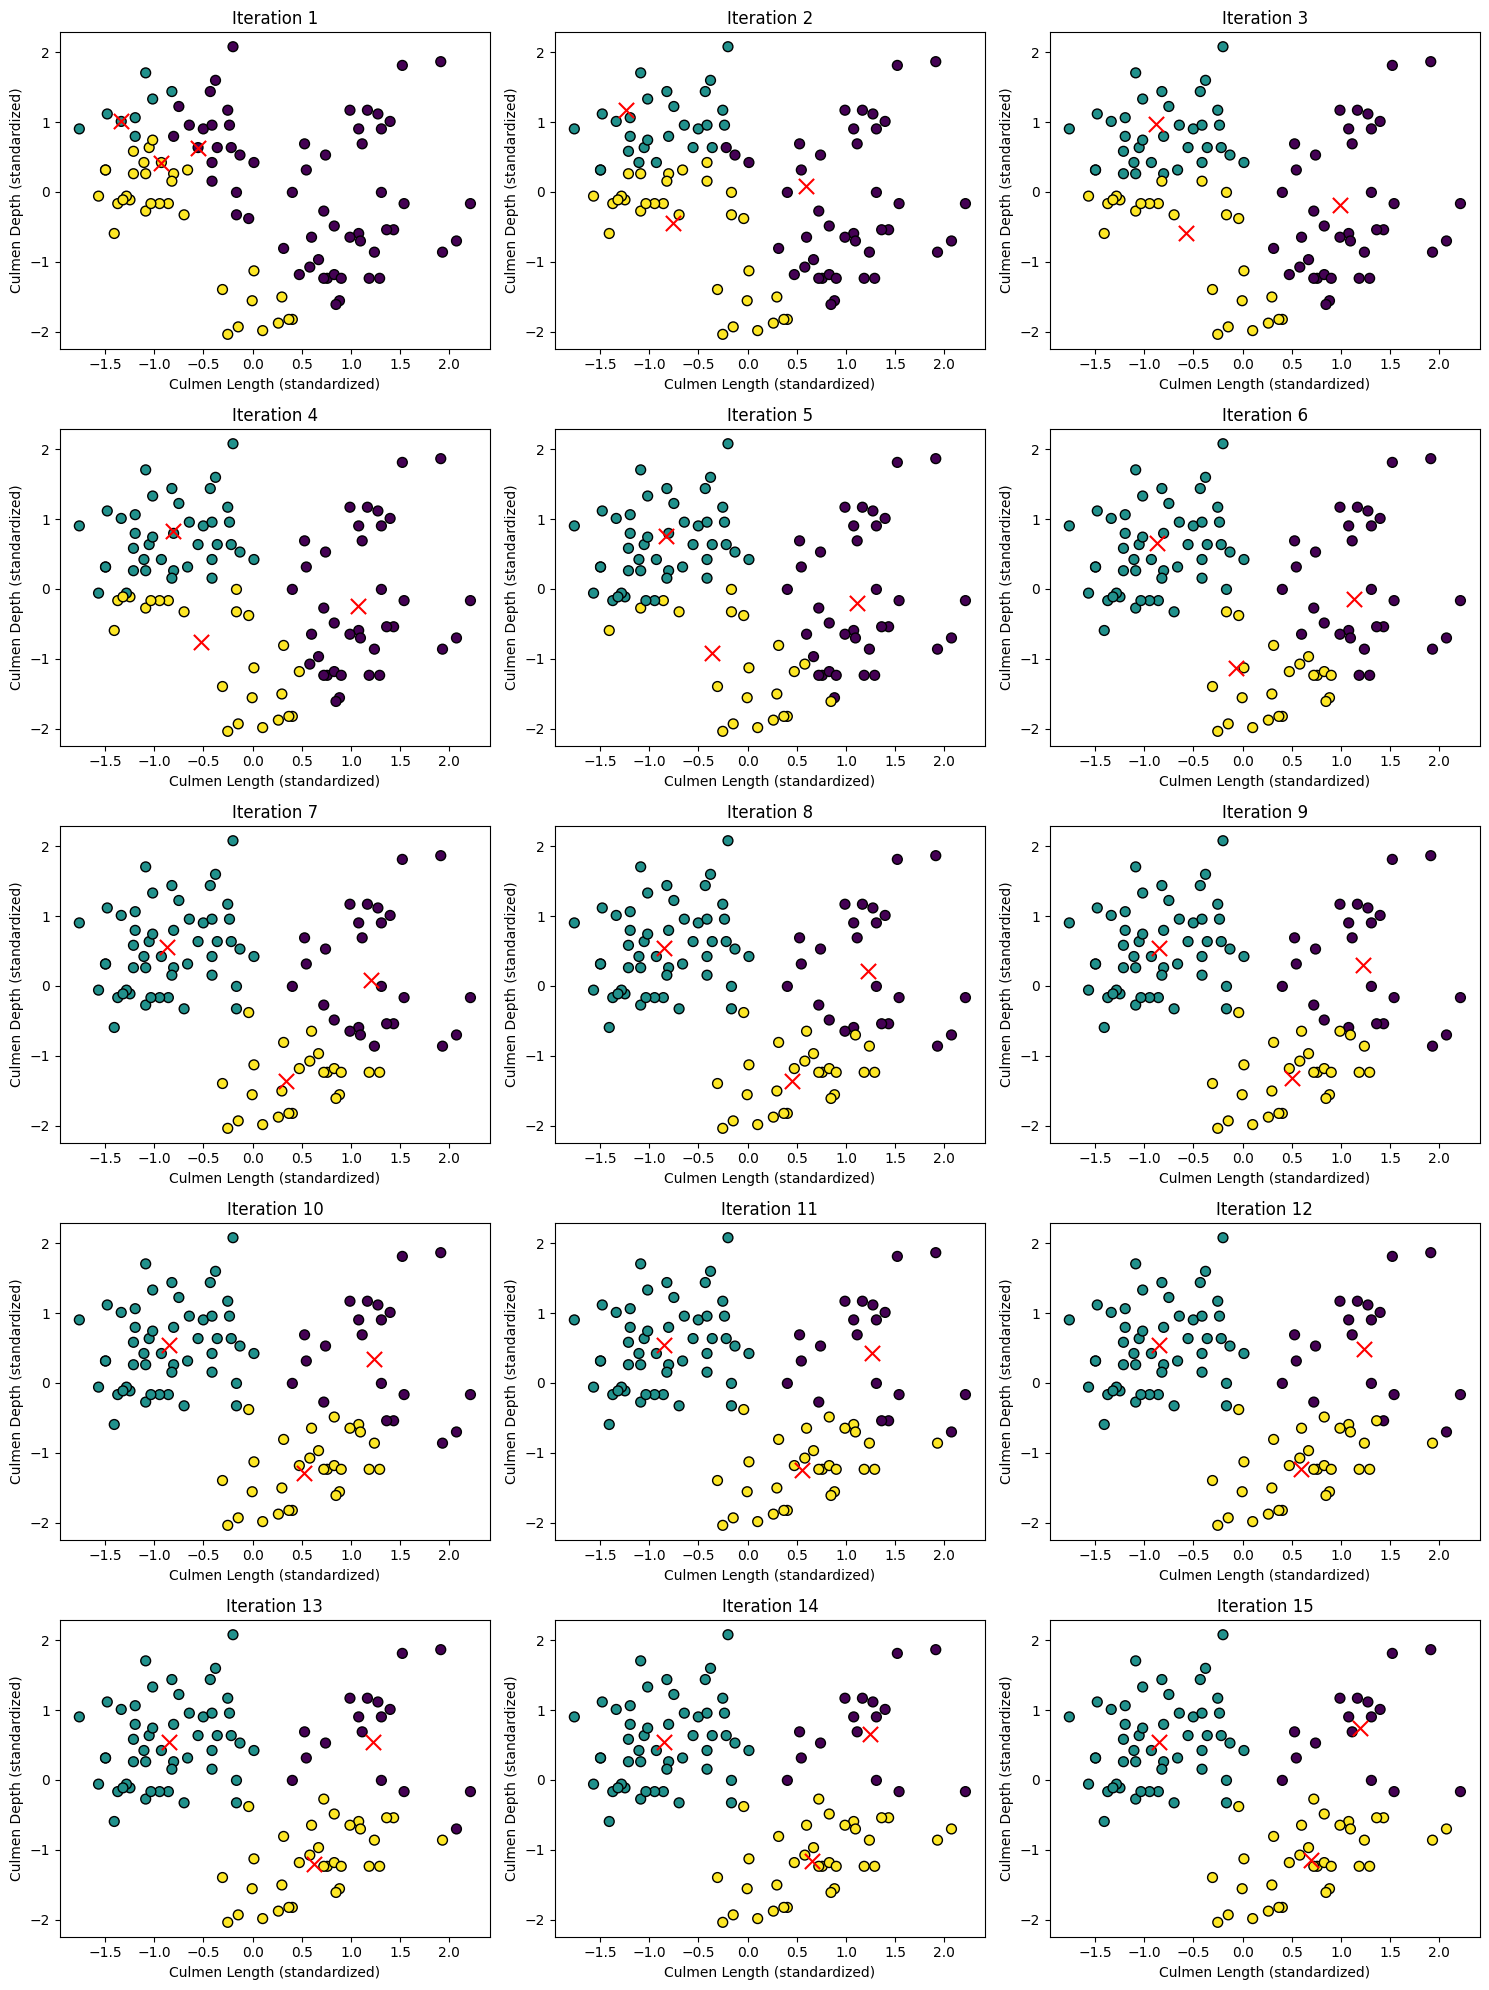

In [ ]:
k = 3
centroids, labels, centroids_history = kmeans(X_scaled, k)
centroids_history = np.array(centroids_history)
num_iters = len(centroids_history)

labels_history = []
for centroids_iter in centroids_history:
    labels_iter = np.argmin(np.linalg.norm(X_scaled[:, np.newaxis] - centroids_iter, axis=2), axis=1)
    labels_history.append(labels_iter)

n_cols = 3
n_rows = int(np.ceil(num_iters / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i in range(num_iters):
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_history[i], cmap='viridis', s=50, edgecolor='k')
    axes[i].scatter(centroids_history[i][:, 0], centroids_history[i][:, 1], s=120, c='red', marker='x')
    axes[i].set_title(f'Iteration {i+1}')
    axes[i].set_xlabel('Culmen Length (standardized)')
    axes[i].set_ylabel('Culmen Depth (standardized)')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

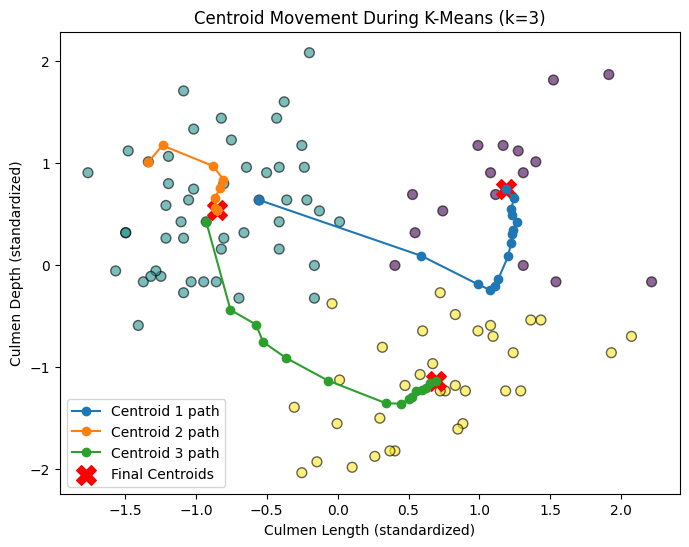

In [ ]:

k = 3
centroids, labels, centroids_history = kmeans(X_scaled, k)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', alpha=0.6)

centroids_history = np.array(centroids_history)
for i in range(k):
    path = centroids_history[:, i, :]
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f'Centroid {i+1} path')

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Final Centroids')

plt.xlabel('Culmen Length (standardized)')
plt.ylabel('Culmen Depth (standardized)')
plt.title('Centroid Movement During K-Means (k=3)')
plt.legend()
plt.show()

### Step 2: Elbow Method

We use the elbow method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for each value of k.

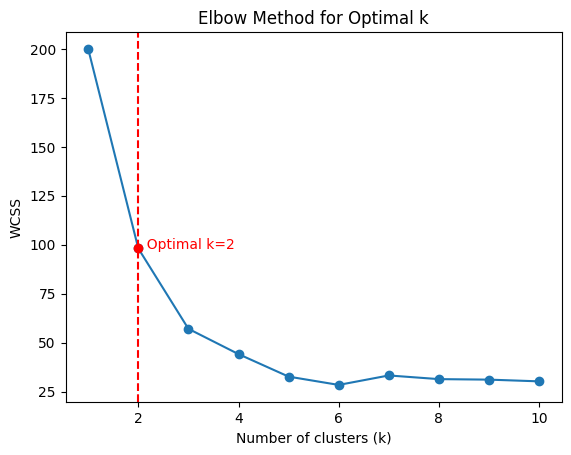

In [42]:
def calculate_wcss(X, k):
    centroids, labels, centroids_history = kmeans(X, k)
    wcss = 0
    for i in range(k):
        cluster_points = X[labels == i]
        wcss += ((cluster_points - centroids[i]) ** 2).sum()
    return wcss

# Calculate WCSS for different values of k
wcss = []
max_k = 10
for k in range(1, max_k + 1):
    wcss.append(calculate_wcss(X_scaled, k))

# Find the optimal k using the Elbow Method
def find_optimal_k(wcss):
    # Calculate the second derivative of WCSS
    second_derivative = np.diff(wcss, 2)
    # Find the index of the maximum second derivative
    optimal_k = np.argmax(second_derivative) + 2  # +2 because np.diff reduces the length by 2
    return optimal_k

optimal_k = find_optimal_k(wcss)

# Plot the elbow method
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

# Highlight the optimal k
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)
plt.text(optimal_k, wcss[optimal_k - 1], f'  Optimal k={optimal_k}', color='red')

plt.show()

In [46]:
# Export the sampled dataset to a CSV file
df_sampled.to_csv("dataset/sampled_penguins.csv", index=False)

### Train-Test Implemantation

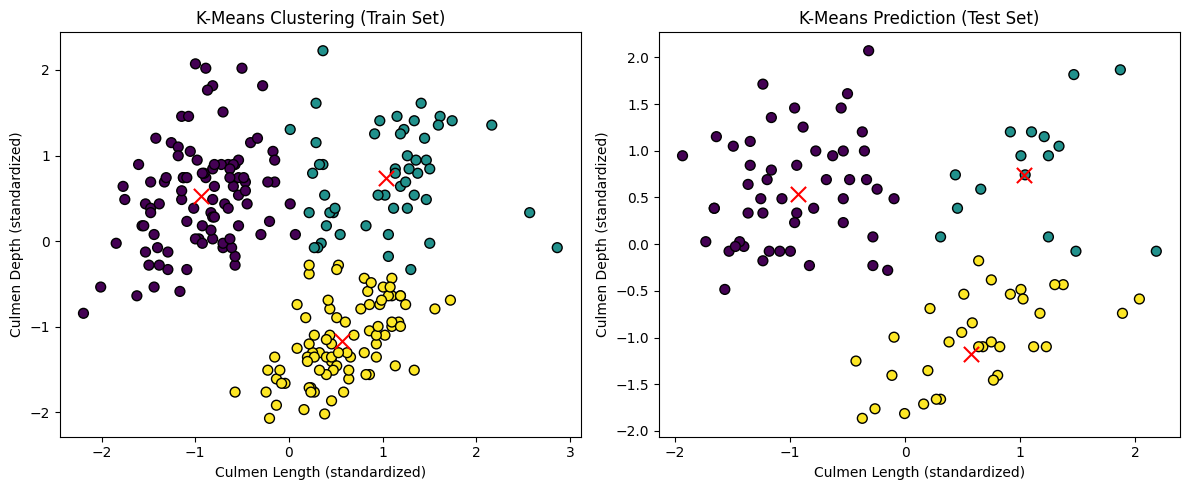

Silhouette Score (Train): 0.523
Silhouette Score (Test): 0.508
Train cluster sizes: [97 52 84]
Test cluster sizes (predicted): [51 16 33]
Train centroids:
 [[-0.93510461  0.5322311 ]
 [ 1.03626109  0.7410179 ]
 [ 0.56961973 -1.17213731]]
Test centroids (fit):
 [[ 1.20119685  0.48881138]
 [-0.99271461  0.59987401]
 [ 0.46145207 -1.10201905]]
Centroid distances (train vs test): [2.13674267 2.03387905 0.12890622]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(X_full_scaled, test_size=0.3, random_state=42)

k = 3
centroids_train, train_labels, _ = kmeans(X_train, k)

def predict_kmeans(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

test_labels = predict_kmeans(X_test, centroids_train)

centroids_test, test_labels_fit, _ = kmeans(X_test, k)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap='viridis', s=50, edgecolor='k')
axes[0].scatter(centroids_train[:, 0], centroids_train[:, 1], s=120, c='red', marker='x')
axes[0].set_title('K-Means Clustering (Train Set)')
axes[0].set_xlabel('Culmen Length (standardized)')
axes[0].set_ylabel('Culmen Depth (standardized)')

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis', s=50, edgecolor='k')
axes[1].scatter(centroids_train[:, 0], centroids_train[:, 1], s=120, c='red', marker='x')
axes[1].set_title('K-Means Prediction (Test Set)')
axes[1].set_xlabel('Culmen Length (standardized)')
axes[1].set_ylabel('Culmen Depth (standardized)')

plt.tight_layout()
plt.show()

# Silhouette scores
sil_train = silhouette_score(X_train, train_labels)
sil_test = silhouette_score(X_test, test_labels)
print(f"Silhouette Score (Train): {sil_train:.3f}")
print(f"Silhouette Score (Test): {sil_test:.3f}")

# Cluster size comparison
print("Train cluster sizes:", np.bincount(train_labels))
print("Test cluster sizes (predicted):", np.bincount(test_labels))

# Centroid comparison
print("Train centroids:\n", centroids_train)
print("Test centroids (fit):\n", centroids_test)
print("Centroid distances (train vs test):", np.linalg.norm(centroids_train - centroids_test, axis=1))